In [3]:
# System Libraries
from tensorflow import keras
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")

# User Libraries
from modules import chapter_01
from modules import common

# Reload Libraries
importlib.reload(chapter_01)
importlib.reload(common)

# Check GPU
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**Single IO using Model API**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 dense (Dense)               (None, 28, 28, 16)        32        
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 dense_1 (Dense)             (None, 28, 28, 10)        170       
                                                                 
Total params: 202 (808.00 Byte)
Trainable params: 202 (808.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


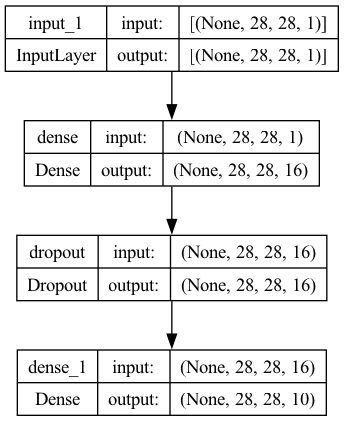

In [2]:
inputs = keras.Input(shape=(28, 28, 1))
x = keras.layers.Dense(units=16, activation=tf.nn.relu)(inputs)
x = keras.layers.Dropout(rate=0.2)(x)
outputs = keras.layers.Dense(units=10, activation=tf.nn.softmax)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()
keras.utils.plot_model(model, "../resources/images/tmp/model.png", show_shapes=True)

**Multi IO using Model API**

In [6]:
num_samples = 1280
num_words = 1000
num_tags = 10
num_priorities = 1
num_departments = 4
num_difficulties = 3
I_title = np.random.randint(low=0, high=10, size=(num_samples, num_words))
I_text = np.random.randint(low=0, high=10, size=(num_samples, num_words))
I_tag = np.random.randint(low=0, high=4, size=(num_samples, num_tags))
O_priority = np.random.random(size=(num_samples, num_priorities))
O_department = np.random.randint(low=0, high=4, size=(num_samples, num_departments))
O_difficulty = np.random.randint(low=0, high=3, size=(num_samples, num_difficulties))
d = 0

In [22]:
L_title = keras.Input(shape=(num_words), name="L_title")
L_text = keras.Input(shape=(num_words), name="L_text")
L_tag = keras.Input(shape=(num_tags), name="L_tag")
inputs = keras.layers.Concatenate()([L_title, L_text, L_tag])
x = keras.layers.Dense(units=16, activation=tf.nn.relu)(inputs)
L_priority = keras.layers.Dense(units=num_priorities, activation=tf.nn.sigmoid, name="L_priority")(x)
L_department = keras.layers.Dense(units=num_departments, activation=tf.nn.softmax, name="L_department")(x)
model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department])

In [23]:
features = model.layers[4].output
L_difficulty = keras.layers.Dense(units=num_difficulties, activation=tf.nn.softmax, name="L_difficulty")(features)
model = keras.Model(inputs=[L_title, L_text, L_tag], outputs=[L_priority, L_department, L_difficulty])

In [24]:
model.compile(
    loss={
        "L_priority": keras.losses.BinaryCrossentropy(),
        "L_department": keras.losses.CategoricalCrossentropy(),
        "L_difficulty": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "L_priority": [keras.metrics.BinaryAccuracy()],
        "L_department": [keras.metrics.CategoricalAccuracy()],
        "L_difficulty": [keras.metrics.CategoricalAccuracy()],
    },
    optimizer=keras.optimizers.legacy.RMSprop(learning_rate=0.001),
)

model.fit(
    x={"L_title": I_title, "L_text": I_text, "L_tag": I_tag},
    y={"L_priority": O_priority, "L_department": O_department, "L_difficulty": O_difficulty},
    epochs=2,
    verbose=False,
)

2024-01-27 10:09:18.065261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


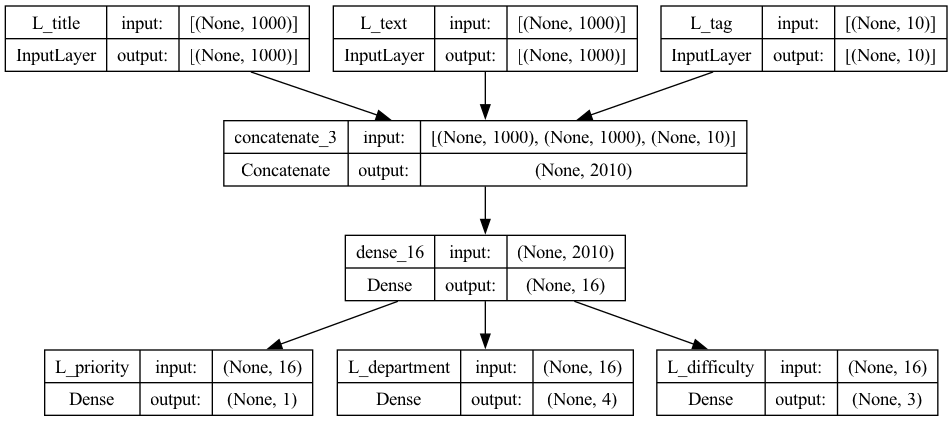

In [26]:
keras.utils.plot_model(model, "../resources/images/tmp/model.png", show_shapes=True)

**Custom Metrics**

**Custom Callbacks**

In [ ]:
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(logs):
        pass

    def on_train_end(logs):
        pass

    def on_epoch_begin(epoch, logs):
        pass

    def on_epoch_end(epoch, logs):
        pass

    def on_batch_begin(epoch, logs):
        pass

    def on_batch_end(epoch, logs):
        pass

**Low Level Metrics**

In [35]:
x = tf.Variable(initial_value=[1, 11, 22, 33])
mean_metric = keras.metrics.Mean()
mean_metric.update_state(x)
mean_value = mean_metric.result()
mean_metric.reset_state()
print(mean_value.numpy())

16.75
